In [ ]:
# https://gucds.inaf.it/GCNS/Original/


In [96]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import LogNorm

import astropy.units as u
import astropy.coordinates as coord
from sklearn.neighbors import KDTree

from astropy.table import Table
import sys
# sys.path.append('/Users/james/python/qthist2d/')
# from qthist2d import qthist, qtcount

sys.path.append('/Users/james/python/cubehelix/')
import cubehelix

In [97]:
import matplotlib
matplotlib.rcParams.update({'font.size':18})
matplotlib.rcParams.update({'font.family':'serif'})

In [5]:
GCNS_file = 'GCNS_cat.fits'
GCNS = Table.read(GCNS_file, format='fits')

In [27]:
# GCNS

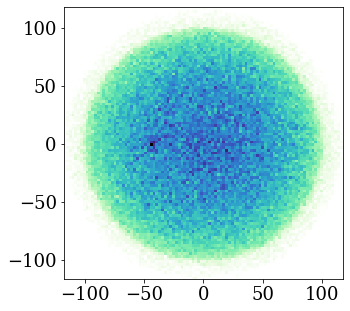

In [98]:
CMAP = cubehelix.cmap(start=0.5, rot=-0.6, sat=1.8, reverse=True)

plt.figure(figsize=(5,5))
_ = plt.hist2d(GCNS['XCOORD_50'], GCNS['YCOORD_50'], cmap=CMAP, bins=100)

In [24]:
# plt.figure(figsize=(5,5))
# _ = plt.hist2d(np.sqrt(GCNS['XCOORD_50']**2 + GCNS['YCOORD_50']**2), GCNS['ZCOORD_50'], cmap=CMAP, bins=100)

In [29]:
c = coord.SkyCoord(ra = GCNS['RA'] * u.degree,
                   dec = GCNS['DEC'] * u.degree,
                   distance= GCNS['DIST_50'] * u.kpc,
                   frame='icrs')
xyz = c.transform_to(coord.Galactocentric) 

In [39]:
xyz.x.value

array([-8.2889027 , -8.29597264, -8.346122  , ..., -8.28053371,
       -8.34984008, -8.28304338])

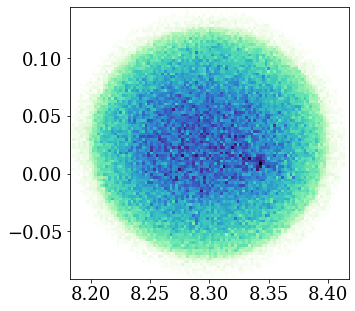

In [99]:
plt.figure(figsize=(5,5))
_ = plt.hist2d(np.sqrt(xyz.x.value**2 + xyz.y.value**2), xyz.z.value, cmap=CMAP, bins=100)

In [58]:
# X = np.vstack((xyz.x.value, xyz.y.value, xyz.z.value)).T
X = np.vstack((GCNS['XCOORD_50'], GCNS['YCOORD_50'], GCNS['ZCOORD_50'])).T
X.shape

(331312, 3)

In [74]:
tree = KDTree(X)
dist, ind = tree.query(X, k=2)

In [75]:
dist.shape

(331312, 2)

(0.0, 4.0)

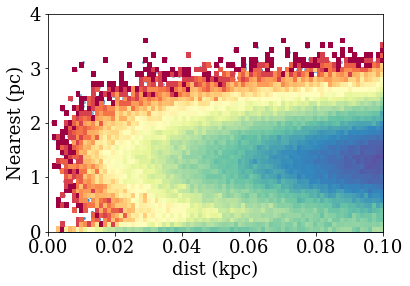

In [115]:
# plt.scatter(GCNS['DIST_50'], dist[:,1], s=4, alpha=0.5)
_ = plt.hist2d(GCNS['DIST_50'], dist[:,1], bins=100, cmap=plt.cm.Spectral, norm=LogNorm())

plt.xlabel('dist (kpc)')
plt.ylabel('Nearest (pc)')
plt.xlim(0, 0.1)
plt.ylim(0,4)

In [179]:
dm = np.where((GCNS['DIST_50'] < 0.1))[0]
am = np.argmax(dist[:,1][dm])

print(GCNS['DIST_50'][dm][am], dist[:,1][dm][am])

GCNS['SOURCE_ID'][dm][am]

0.08807445956863194 3.541663731435504


5740455002078576384

In [187]:
# GCNS.colnames

Text(0.5, 1.0, 'GCNS')

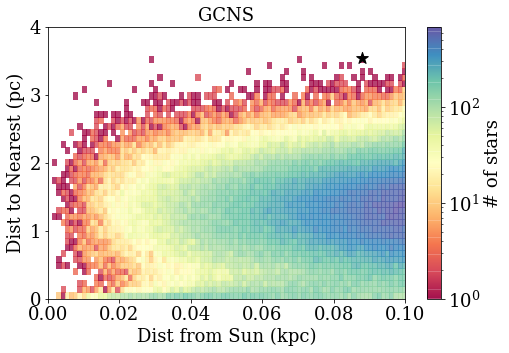

In [143]:
plt.figure(figsize=(8,5))
_ = plt.hist2d(GCNS['DIST_50'], dist[:,1], bins=100, cmap=plt.cm.Spectral, norm=LogNorm(),alpha=0.75)
cb=plt.colorbar()
cb.set_label('# of stars')

plt.scatter(GCNS['DIST_50'][dm][am], dist[:,1][dm][am], c='k', s=150, marker='*')

plt.xlabel('Dist from Sun (kpc)')
plt.ylabel('Dist to Nearest (pc)')
plt.xlim(0, 0.1)
plt.ylim(0,4)
plt.title('GCNS',fontsize=18)


In [158]:
def medbin(x,y,nbins=50, std=True):
    xbin0 = np.linspace(np.nanmin(x), np.nanmax(x), nbins)
    ybin = np.zeros(nbins-1)
    xbin = np.zeros(nbins-1)
    if std:
        ystd = np.zeros(nbins-1)
        xstd = np.zeros(nbins-1)

    for k in range(len(xbin0)-1):
        kind = np.where((x >= xbin0[k]) & (x < xbin0[k+1]))[0]
        if len(kind) > 0:
            ybin[k] = np.median(y[kind])
            xbin[k] = np.median(x[kind])
            if std:
                ystd[k] = np.std(y[kind])
                xstd[k] = np.std(x[kind])
    if std:
        return xbin,ybin,xstd,ystd
    return xbin,ybin

Text(0.07, 0.05, '@jradavenport')

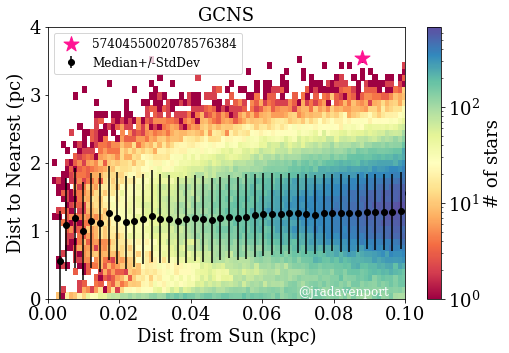

In [184]:
plt.figure(figsize=(8,5))
_ = plt.hist2d(GCNS['DIST_50'], dist[:,1], bins=100, cmap=plt.cm.Spectral, norm=LogNorm())
cb=plt.colorbar()
cb.set_label('# of stars')

plt.scatter(GCNS['DIST_50'][dm][am], dist[:,1][dm][am], c='DeepPink', s=250, 
            marker='*',label=GCNS['SOURCE_ID'][dm][am])

xbin,ybin,xstd,ystd = medbin(GCNS['DIST_50'], dist[:,1], nbins=50, std=True)
plt.errorbar(xbin,ybin, yerr=ystd,c='k', linestyle='none',marker='o',label='Median+/-StdDev')
plt.legend(fontsize=12)
plt.xlabel('Dist from Sun (kpc)')
plt.ylabel('Dist to Nearest (pc)')
plt.xlim(0, 0.1)
plt.ylim(0,4)
plt.title('GCNS',fontsize=18)
plt.text(0.07,0.05,'@jradavenport',color='w', fontsize=12)

In [186]:
np.mean(ybin)

1.440443782145372

In [188]:
sum(GCNS['DIST_50'] <= 1)

331312

Text(0, 0.5, '$M_G$ (mag)')

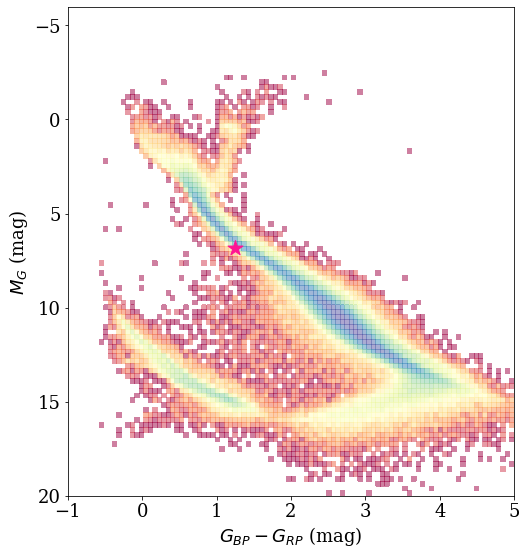

In [204]:
aok = np.where(np.isfinite(GCNS['PHOT_BP_MEAN_MAG']) & (GCNS['DIST_50'] > 0) & (GCNS['DIST_50'] < 0.1))[0]

plt.figure(figsize=(8,9))
_ = plt.hist2d(GCNS['PHOT_BP_MEAN_MAG'][aok] - GCNS['PHOT_RP_MEAN_MAG'][aok], 
               GCNS['PHOT_G_MEAN_MAG'][aok] - 5.*np.log10(1000*GCNS['DIST_50'][aok])+5, 
               bins=100, cmap=plt.cm.Spectral, norm=LogNorm(), range=[[-1,5],[-6,20]], alpha=0.5)
plt.gca().invert_yaxis()


plt.scatter((GCNS['PHOT_BP_MEAN_MAG'][dm][am] - GCNS['PHOT_RP_MEAN_MAG'][dm][am]), 
               GCNS['PHOT_G_MEAN_MAG'][dm][am]- 5.*np.log10(1000*GCNS['DIST_50'][dm][am])+5, c='DeepPink', s=250, 
            marker='*',label=GCNS['SOURCE_ID'][dm][am])

plt.xlabel('$G_{BP} - G_{RP}$ (mag)')
plt.ylabel('$M_G$ (mag)')


In [189]:
GCNS.colnames

['SOURCE_ID',
 'RA',
 'RA_ERROR',
 'DEC',
 'DEC_ERROR',
 'PARALLAX',
 'PARALLAX_ERROR',
 'PMRA',
 'PMRA_ERROR',
 'PMDEC',
 'PMDEC_ERROR',
 'PHOT_G_MEAN_MAG',
 'PHOT_G_MEAN_FLUX_OVER_ERROR',
 'PHOT_BP_MEAN_MAG',
 'PHOT_BP_MEAN_FLUX_OVER_ERROR',
 'PHOT_RP_MEAN_MAG',
 'PHOT_RP_MEAN_FLUX_OVER_ERROR',
 'PHOT_BP_RP_EXCESS_FACTOR',
 'RUWE',
 'IPD_FRAC_MULTI_PEAK',
 'ADOPTEDRV',
 'ADOPTEDRV_ERROR',
 'ADOPTEDRV_REFNAME',
 'RADIAL_VELOCITY_IS_VALID',
 'GCNS_PROB',
 'WD_PROB',
 'DIST_1',
 'DIST_16',
 'DIST_50',
 'DIST_84',
 'XCOORD_50',
 'XCOORD_16',
 'XCOORD_84',
 'YCOORD_50',
 'YCOORD_16',
 'YCOORD_84',
 'ZCOORD_50',
 'ZCOORD_16',
 'ZCOORD_84',
 'UVEL_50',
 'UVEL_16',
 'UVEL_84',
 'VVEL_50',
 'VVEL_16',
 'VVEL_84',
 'WVEL_50',
 'WVEL_16',
 'WVEL_84',
 'NAME_GUNN',
 'REFNAME_GUNN',
 'GMAG_GUNN',
 'E_GMAG_GUNN',
 'RMAG_GUNN',
 'E_RMAG_GUNN',
 'IMAG_GUNN',
 'E_IMAG_GUNN',
 'ZMAG_GUNN',
 'E_ZMAG_GUNN',
 'NAME_2MASS',
 'J_M_2MASS',
 'J_MSIG_2MASS',
 'H_M_2MASS',
 'H_MSIG_2MASS',
 'K_M_2MASS',
 'K_MS